# **Stock Price Forecasting Using LSTM and GRU**

# **Introduction**

In [123]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

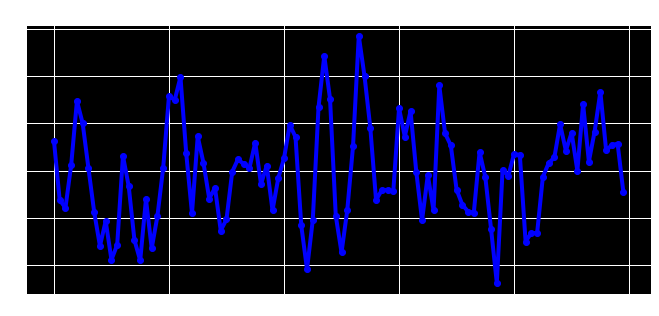

In [124]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Generate the data
import numpy as np
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
my_simulation = ArmaProcess(ar, ma).generate_sample(nsample=100)

plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()

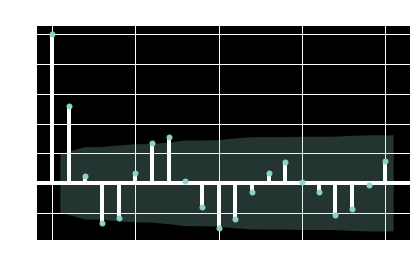

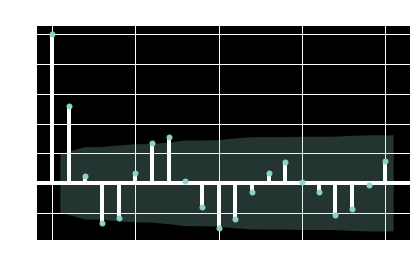

In [125]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

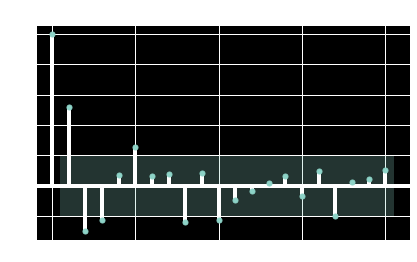

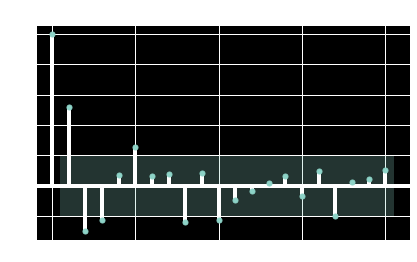

In [126]:
plot_pacf(my_simulation)

In [127]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))
mod_fit = mod.fit()
print(mod_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -126.960
Date:                Sat, 20 Aug 2022   AIC                            261.921
Time:                        19:24:36   BIC                            272.341
Sample:                             0   HQIC                           266.138
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0348      0.143     -0.243      0.808      -0.315       0.245
ar.L1          0.6705      0.108      6.225      0.000       0.459       0.882
ar.L2         -0.2997      0.090     -3.339      0.0

In [128]:
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.49846963, 0.28708802, 0.72437741, 0.47838525, 0.68905996,
       0.00812248, 0.21574443, 0.7550441 , 0.98622356, 0.60494662,
       0.48084382, 0.12278292, 0.73983752, 0.05762794, 0.64499781,
       0.60861855, 0.63473215, 0.60660903, 0.44120232, 0.62069945])

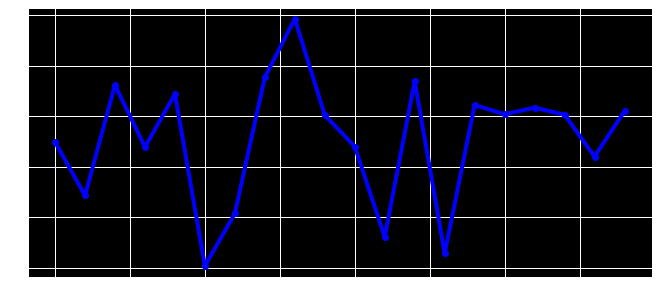

In [129]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.show()

In [130]:
array.reshape((4,5,1))

array([[[0.49846963],
        [0.28708802],
        [0.72437741],
        [0.47838525],
        [0.68905996]],

       [[0.00812248],
        [0.21574443],
        [0.7550441 ],
        [0.98622356],
        [0.60494662]],

       [[0.48084382],
        [0.12278292],
        [0.73983752],
        [0.05762794],
        [0.64499781]],

       [[0.60861855],
        [0.63473215],
        [0.60660903],
        [0.44120232],
        [0.62069945]]])

In [131]:

array.reshape((2,5,2))

array([[[0.49846963, 0.28708802],
        [0.72437741, 0.47838525],
        [0.68905996, 0.00812248],
        [0.21574443, 0.7550441 ],
        [0.98622356, 0.60494662]],

       [[0.48084382, 0.12278292],
        [0.73983752, 0.05762794],
        [0.64499781, 0.60861855],
        [0.63473215, 0.60660903],
        [0.44120232, 0.62069945]]])

In [132]:
# Example 1
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))

# Example 2
array.reshape((4,5,1))

# Example 3
array.reshape((2,5,2))

array([[[0.39127169, 0.34487015],
        [0.91256978, 0.68183702],
        [0.94174025, 0.13732313],
        [0.92112383, 0.25578695],
        [0.94374013, 0.66068336]],

       [[0.87875001, 0.21649088],
        [0.25766726, 0.04920924],
        [0.59963124, 0.70339555],
        [0.6389918 , 0.16050303],
        [0.81436771, 0.35220061]]])

In [133]:
# IF it is image data:
# Create an RGB image that is 3 dimensional arrays of 8-bit unsigned integers.
width = 5
height = 4
RGB = 3
p = width * height * RGB
img_data = np.random.randint(100,high=255, size=p, dtype=np.uint8) # Generate values in (100,255)
img_data = img_data.reshape((height, width, RGB))
img_data

array([[[174, 188, 144],
        [155, 243, 163],
        [242, 233, 185],
        [104, 107, 161],
        [120, 198, 155]],

       [[151, 222, 244],
        [108, 155, 229],
        [113, 133, 232],
        [211, 120, 234],
        [236, 141, 236]],

       [[170, 164, 107],
        [198, 161, 226],
        [210, 204, 241],
        [220, 190, 116],
        [128, 138, 140]],

       [[194, 165, 165],
        [153, 125, 223],
        [242, 218, 213],
        [224, 213, 173],
        [197, 110, 248]]], dtype=uint8)

In [134]:
from PIL import Image
img = Image.fromarray( img_data)
img.show()

# **Importing Data**

Getting the Amazon stock data from yahoo financial API 

In [135]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
AMZN = yf.download('AMZN', 
                      start='2013-01-01', 
                      end='2022-08-09', 
                      progress=False)
# AMZN = yf.download('AMZN') for all 
all_data = AMZN[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)


### **Let's Understand more about the data.**

In [136]:
all_data.to_csv('stock_data.csv')

In [137]:
all_data.head(10)

Adj Close   Open   High    Low  Close    Volume
Date                                                       
2012-12-31      12.54  12.19  12.62  12.14  12.54  68380000
2013-01-02      12.87  12.80  12.90  12.66  12.87  65420000
2013-01-03      12.92  12.86  13.04  12.82  12.92  55018000
2013-01-04      12.96  12.88  12.99  12.83  12.96  37484000
2013-01-07      13.42  13.15  13.49  13.13  13.42  98200000
2013-01-08      13.32  13.35  13.45  13.18  13.32  60214000
2013-01-09      13.32  13.41  13.48  13.27  13.32  45312000
2013-01-10      13.27  13.43  13.44  13.11  13.27  57268000
2013-01-11      13.40  13.26  13.42  13.21  13.40  48266000
2013-01-14      13.64  13.40  13.71  13.38  13.64  85500000

In [138]:
all_data.tail()

Adj Close    Open    High     Low   Close    Volume
Date                                                           
2022-08-02     134.16  134.72  137.44  134.09  134.16  61922400
2022-08-03     139.52  136.21  140.49  136.05  139.52  71827800
2022-08-04     142.57  140.58  143.56  139.55  142.57  70585000
2022-08-05     140.80  140.10  142.86  139.60  140.80  50650100
2022-08-08     139.41  142.05  144.23  138.29  139.41  52229000

# **EXploratory Data Analysis (EDA)**

In [139]:
all_data.shape

(2418, 6)

In [140]:
all_data.columns

Index(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

#### **Let's Understand More About The Data**

In [141]:
all_data.duplicated()

Date
2012-12-31    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-07    False
              ...  
2022-08-02    False
2022-08-03    False
2022-08-04    False
2022-08-05    False
2022-08-08    False
Length: 2418, dtype: bool

In [142]:
all_data.duplicated().sum()

0

In [143]:
#Getting all the columns
print("Features of the dataset:")
all_data.columns

Features of the dataset:


Index(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [144]:
#check details about the data set
print('Here is the information regarding the dataset :')
all_data.info()

Here is the information regarding the dataset :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2418 entries, 2012-12-31 to 2022-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2418 non-null   float64
 1   Open       2418 non-null   float64
 2   High       2418 non-null   float64
 3   Low        2418 non-null   float64
 4   Close      2418 non-null   float64
 5   Volume     2418 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.2 KB


In [145]:
#print the unique value
print('Here is the unique values in our dataset')
all_data.nunique()

Here is the unique values in our dataset


Adj Close    2042
Open         2000
High         2038
Low          2070
Close        2042
Volume       2371
dtype: int64

In [146]:
#printign the data types of our data
print('Here is the data types of the dataset :')
all_data.dtypes

Here is the data types of the dataset :


Adj Close    float64
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
dtype: object

In [147]:
#Looking for the description of the dataset to get insights of the data
all_data.describe(include='all').T

count          mean           std          min           25%  \
Adj Close  2418.0  7.222937e+01  5.372451e+01        12.41  2.147500e+01   
Open       2418.0  7.225963e+01  5.377569e+01        12.19  2.148250e+01   
High       2418.0  7.306440e+01  5.442397e+01        12.62  2.162750e+01   
Low        2418.0  7.136578e+01  5.305383e+01        12.14  2.131000e+01   
Close      2418.0  7.222937e+01  5.372451e+01        12.41  2.147500e+01   
Volume     2418.0  8.069181e+07  4.263939e+07  17626000.00  5.377100e+07   

                    50%           75%           max  
Adj Close  5.125000e+01  1.006475e+02  1.865700e+02  
Open       5.100500e+01  1.012350e+02  1.872000e+02  
High       5.144500e+01  1.020050e+02  1.886500e+02  
Low        5.043000e+01  1.001625e+02  1.848400e+02  
Close      5.125000e+01  1.006475e+02  1.865700e+02  
Volume     6.909700e+07  9.354250e+07  4.771220e+08

In [148]:
#check for count of missing values in each column.
print('Here are the details of missing value details in our dataet:')
all_data.isna().sum()
all_data.isnull().sum()

Here are the details of missing value details in our dataet:


Adj Close    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



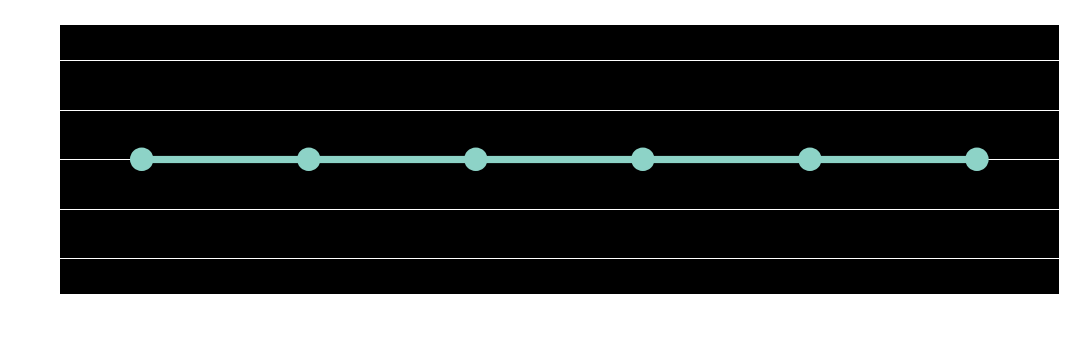

In [149]:
import seaborn as sns
missing = pd.DataFrame((all_data.isnull().sum())*100/all_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<AxesSubplot:xlabel='Date'>

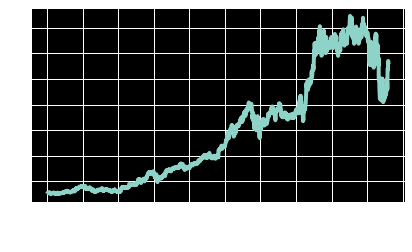

In [150]:
all_data['Close'].plot()

<AxesSubplot:xlabel='Date'>

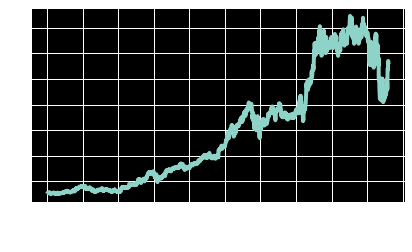

In [151]:
new_var = all_data['Adj Close'].plot()
new_var

<AxesSubplot:xlabel='Date'>

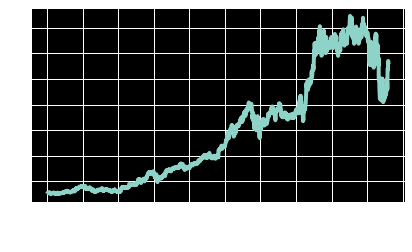

In [152]:
all_data['Adj Close'].plot()

<AxesSubplot:xlabel='Open', ylabel='count'>

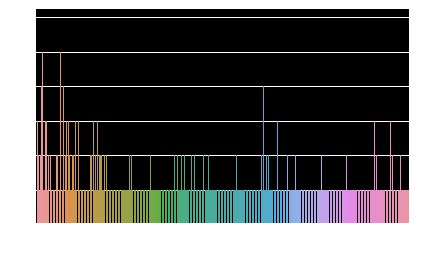

In [153]:
sns.countplot(x=all_data.Open)

In [154]:
data = pd.read_csv('stock_data.csv')

In [155]:
data.head()

Date  Adj Close   Open   High    Low  Close    Volume
0  2012-12-31      12.54  12.19  12.62  12.14  12.54  68380000
1  2013-01-02      12.87  12.80  12.90  12.66  12.87  65420000
2  2013-01-03      12.92  12.86  13.04  12.82  12.92  55018000
3  2013-01-04      12.96  12.88  12.99  12.83  12.96  37484000
4  2013-01-07      13.42  13.15  13.49  13.13  13.42  98200000

#### **Seasonality Plot for each column in our data**

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose

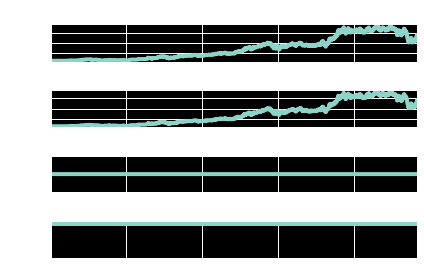

In [157]:
decompose_result = seasonal_decompose(data.Open, model='multiplicative', period=1)
decompose_result.plot();

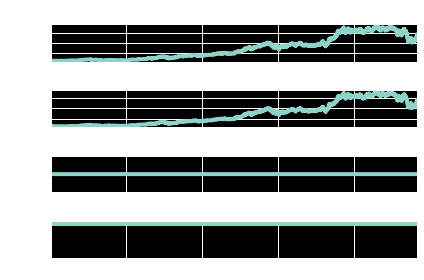

In [158]:
decompose_result = seasonal_decompose(data.Close, model='multiplicative', period=1)
decompose_result.plot();

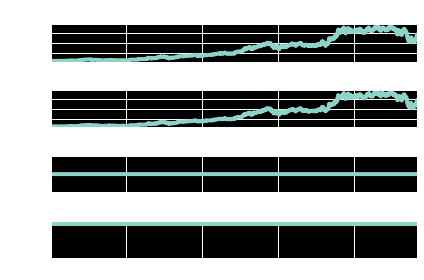

In [159]:
decompose_result = seasonal_decompose(data.High, model='multiplicative', period=1)
decompose_result.plot();

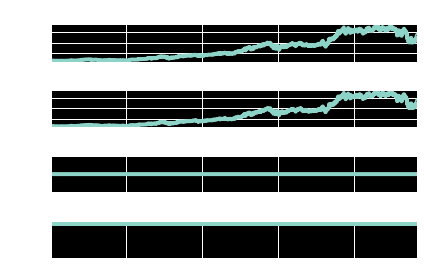

In [160]:
decompose_result = seasonal_decompose(data.Low, model='multiplicative', period=1)
decompose_result.plot();

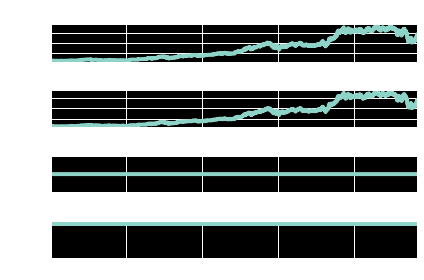

In [161]:
decompose_result = seasonal_decompose(data['Adj Close'], model='multiplicative', period=1)
decompose_result.plot();

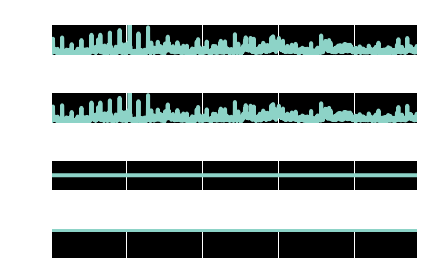

In [162]:
decompose_result = seasonal_decompose(data['Volume'], model='multiplicative', period=1)
decompose_result.plot();

**As We can see from the above there is no seasonality in our data.**

### **Distribution Plot**

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



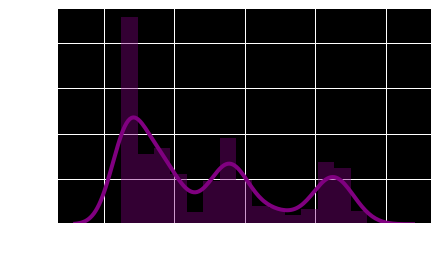

In [163]:
sns.distplot(data['Adj Close'].dropna(), color='purple');
plt.ylabel('Daily Return');

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

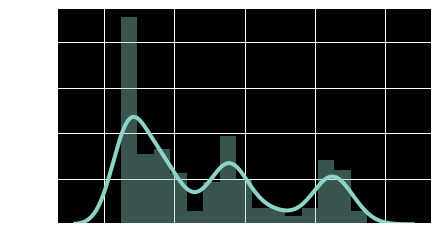

In [164]:
sns.distplot(x=all_data.Open)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

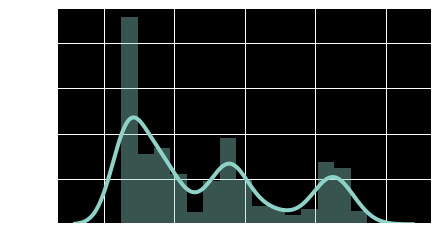

In [165]:
sns.distplot(x=all_data.Close)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

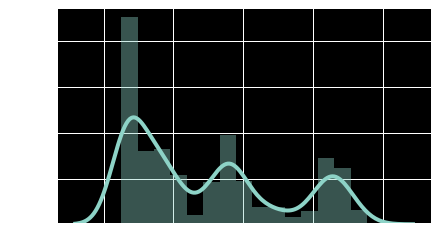

In [166]:
sns.distplot(x=all_data.High)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

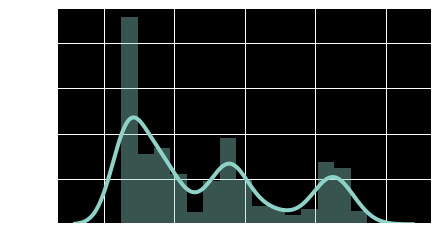

In [167]:
sns.distplot(x=all_data.Close)

In [168]:
data.columns, data.head()

(Index(['Date', 'Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object'),
          Date  Adj Close   Open   High    Low  Close    Volume
 0  2012-12-31      12.54  12.19  12.62  12.14  12.54  68380000
 1  2013-01-02      12.87  12.80  12.90  12.66  12.87  65420000
 2  2013-01-03      12.92  12.86  13.04  12.82  12.92  55018000
 3  2013-01-04      12.96  12.88  12.99  12.83  12.96  37484000
 4  2013-01-07      13.42  13.15  13.49  13.13  13.42  98200000)

### **Line Plots**

In [169]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

In [170]:
fig = px.line(data,x = 'Date', y = ['High', 'Low'], template = 'plotly_dark')
fig.show()

In [171]:
fig = px.line(data,x = 'Date', y = ['Open', 'Close'], template = 'plotly_dark')
fig.show()

In [172]:
fig = px.line(data,x = 'Date', y = ['Adj Close'], template = 'plotly_dark')
fig.show()

**From above plots we can conclude that:**

**1. High - Increases over time**

**2. Low - Increases over time**

**3. Open - Increases over time**

**4. Close - Increases over time**

In [173]:
fig = px.line(data,x = 'Date', y = ['Volume'], template = 'plotly_dark')
fig.show()

**From above plot we can conclude that : Volume doesn't increase gradually but have non-linear decrement**

### **Candle Stick Plot**

In [174]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'] ,increasing_line_color= 'cyan', decreasing_line_color= 'gray')])

fig.show()

**From above plot we can conclude that:Amazon's Stock increases over time and then have sudden shift in its increment**

### **Joint Plot**

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



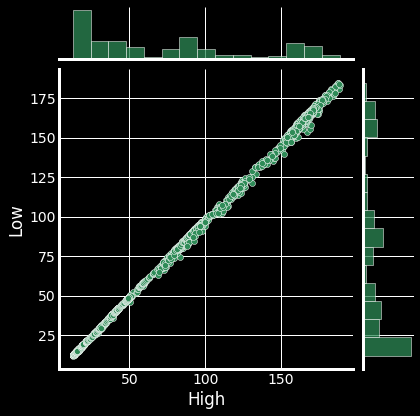

In [175]:
sns.jointplot('High', 'Low', data, kind='scatter', color='seagreen');

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



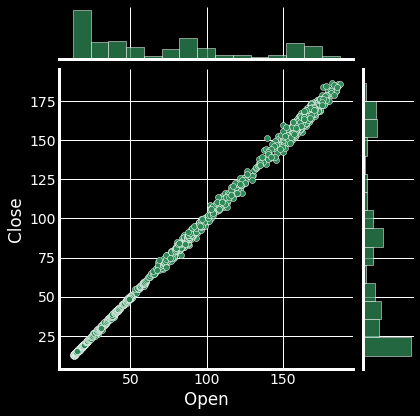

In [176]:
sns.jointplot('Open', 'Close', data, kind='scatter', color='seagreen');

**From above plot we can conclude that:**


**1. High and low are linarly dependent**


**2. Open and close are linearly dependent**

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



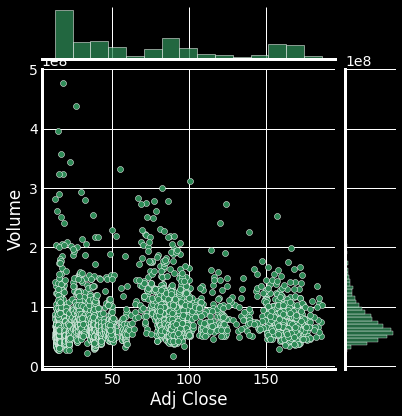

In [177]:
sns.jointplot('Adj Close', 'Volume', data, kind='scatter', color='seagreen');

**From above plot we can conclude that: For high values for VOLUME , Adj Close have low values so, they are inversely proportional.**

### **Pairplot**

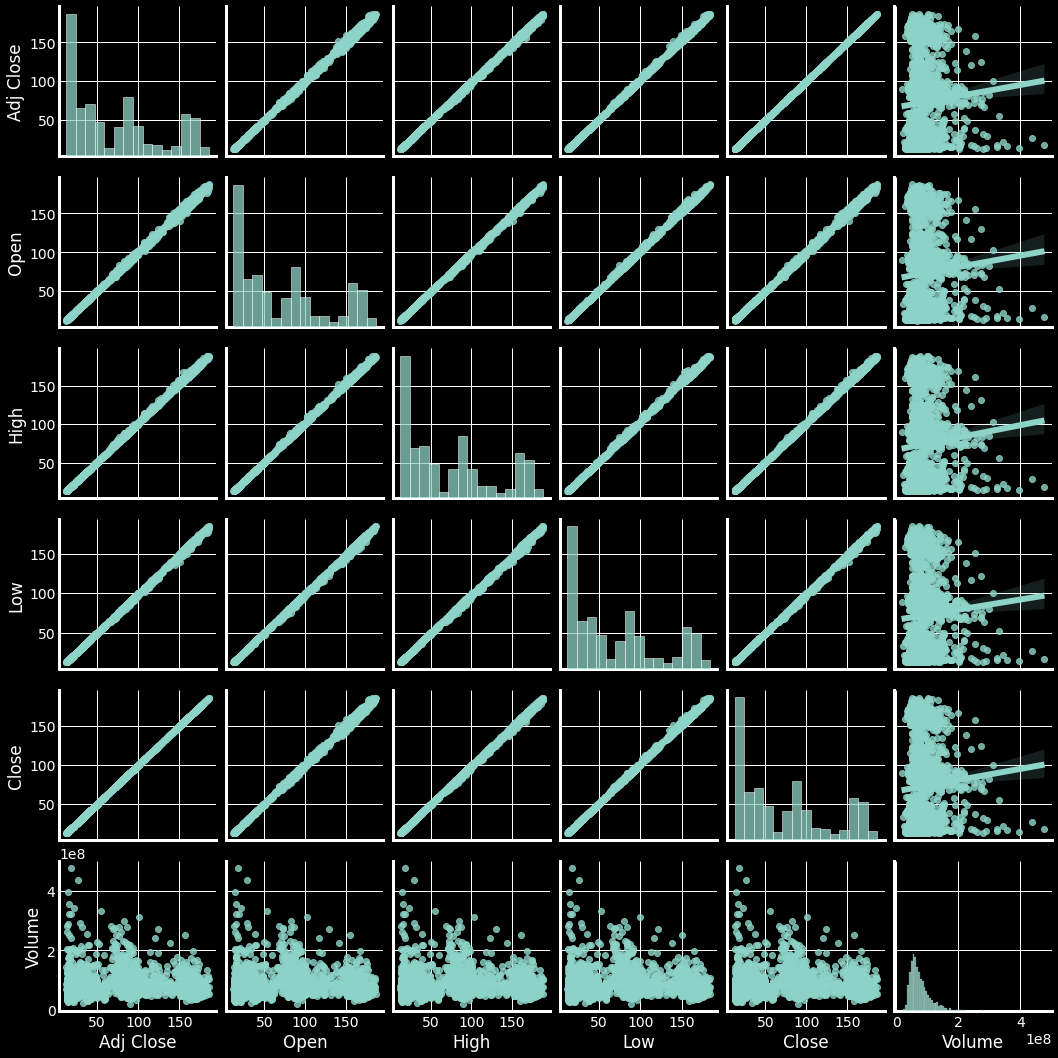

In [178]:
sns.pairplot(data.drop('Date', axis =1), kind='reg');

### **Correlation Plot**

In [179]:
fig = px.imshow(data.corr(), template = 'plotly_dark')
fig.show()

**From the above figure we can see that except volume all columns are highly correlated with each other.**

### **Box Plot**

In [180]:
fig = px.box(data,x=['Open', 'High', 'Low', 'Close', 'Adj Close'], template = 'plotly_dark', 
             title = 'Representation of Type of Stars with Temperature')
fig.show()

In [181]:
fig = px.box(data,x=['Volume'], template = 'plotly_dark', 
             title = 'Representation of Type of Stars with Temperature')
fig.show()

### **3D - Scatter Plot**

In [182]:
fig = px.scatter_3d(data, x='High', y='Low', z='Close',
              color='Adj Close', template = 'plotly_dark', title = 'Distribution of Highs, Lows and Closing Values represented by Adj Close')
fig.show()

In [183]:
print('Ternary Scatter Plot')
fig = px.scatter_ternary(data, a="High", b="Low", c="Close",hover_name="Volume",
    color="Adj Close", template = 'plotly_dark', size_max=30,)
fig.show()

Ternary Scatter Plot


<BarContainer object of 32 artists>

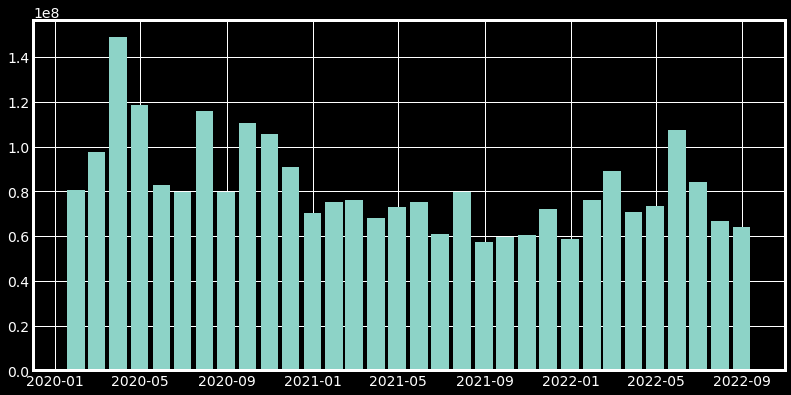

In [184]:
from matplotlib import dates
df_month = all_data.resample("M").mean()
fig, ax = plt.subplots(figsize=(12, 6))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
ax.bar(df_month['2020':].index, df_month.loc['2020':, "Volume"], width=25, align='center')

### **Resampling and Rolling**

Resampling is very common in time-series data. Most of the time resampling is done to a lower frequency.Though resampling of higher frequency is also necessary especially for modeling purposes. Not so much in data analysis purpose. In the ‘Volume’ data we are working on right now, we can observe some big spikes here and there. These types of spikes are not helpful for data analysis or for modeling. normally to smooth out the spikes, resampling to a lower frequency and rolling is very helpful.

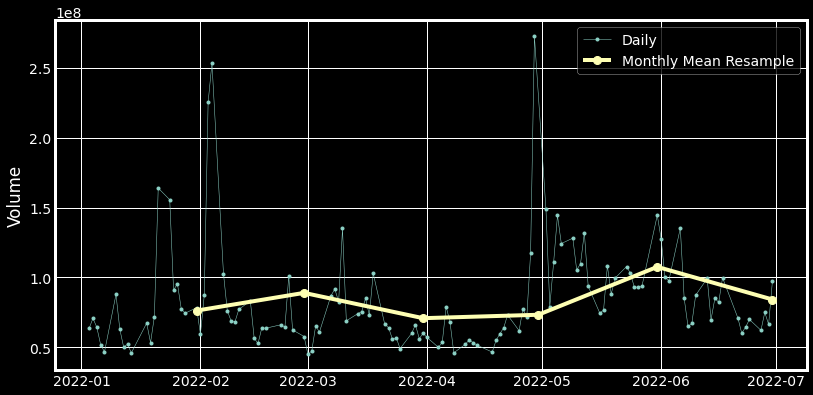

In [185]:
start, end = '2022-01', '2022-06'
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(all_data.loc[start:end, 'Volume'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_month.loc[start:end, 'Volume'],
marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Volume')
ax.legend();

#### **Week Resample**

In [186]:
df_week = all_data.resample("W").mean()

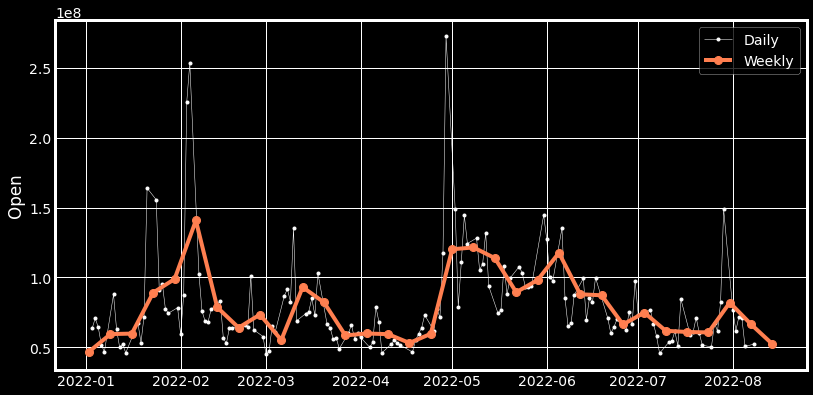

In [187]:
start, end = '2022-01', '2022-08'
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(all_data.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='white')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Open")
ax.legend()

#### **Rolling**

Rolling is another very helpful way of smoothing out the curve. It takes the average of a specified amount of data. If I want a 7-day rolling, it gives us the 7-day average data.

We are doing it on the above plot

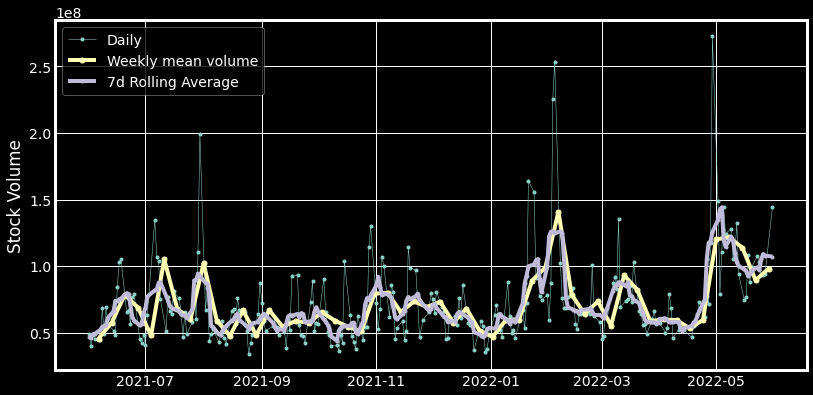

In [188]:
df_7d_rolling = all_data.rolling(7, center=True).mean()
start, end = '2021-06', '2022-05'
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(all_data.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

7-d rolling average is a bit smoother than the weekly average.

### **Differencing**

Differencing takes the difference in values of a specified distance.It is a popular method to remove the trend in the data. The trend is not good for forecasting or modeling.

I've used expanding window,an another way of transformation. It keeps adding the cumulative. For example, if you add an expanding function to the ‘High’ column first element remains the same. The second element becomes cumulative of the first and second element, the third element becomes cumulative of the first, second, and third element, and so on. You can use aggregate functions like mean, median, standard deviation, etc. on it too

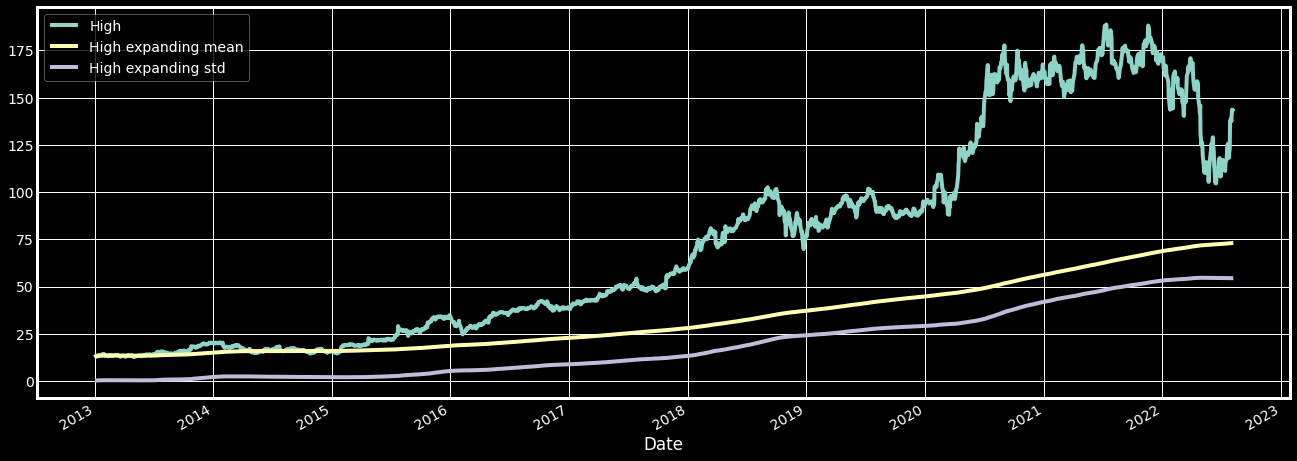

In [189]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = all_data.High.plot(label='High')
ax = all_data.High.expanding().mean().plot(label='High expanding mean')
ax = all_data.High.expanding().std().plot(label='High expanding std')
ax.legend()

### **Decomposition**

**Decomposition will show the observations and these three elements in the same plot:**

**1. Trend: Consistent upward or downward slope of a time series.**

**2. Seasonality: Clear periodic pattern of a time series**

**3. Noise: Outliers or missing values**

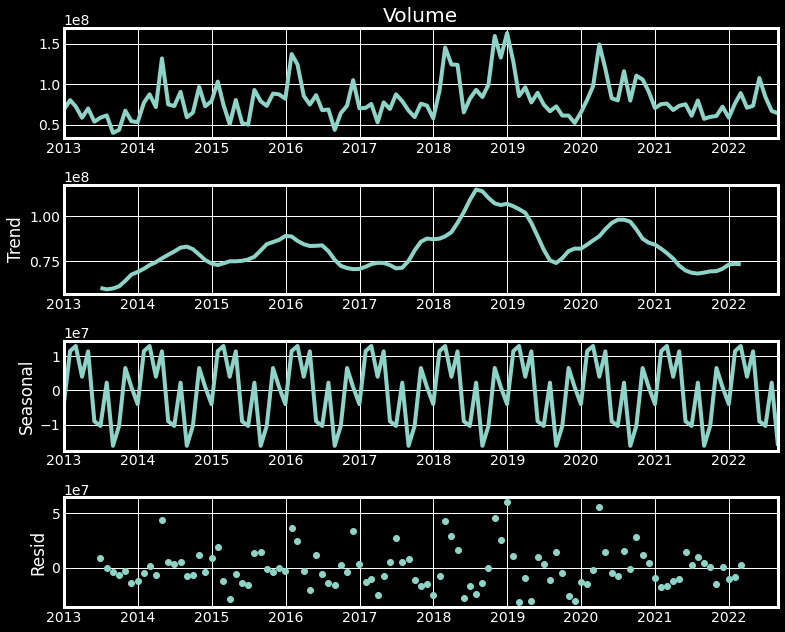

In [190]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Volume'], model='Additive')
fig = decomposition.plot()
plt.show()

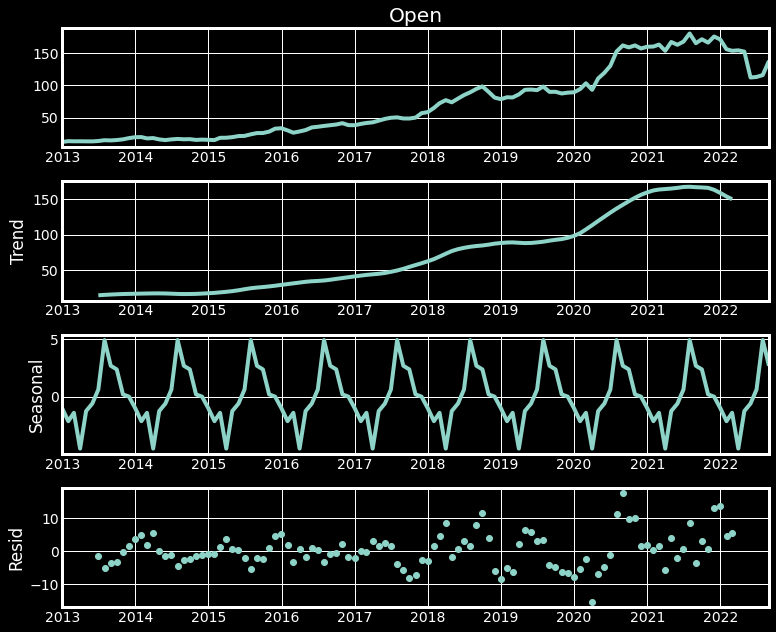

In [191]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Open'], model='Additive')
fig = decomposition.plot()
plt.show()

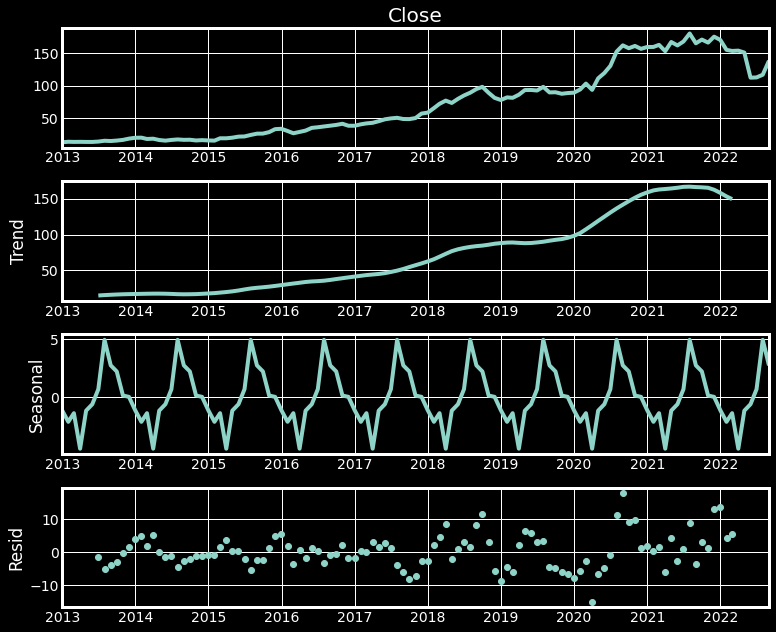

In [192]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Close'], model='Additive')
fig = decomposition.plot()
plt.show()

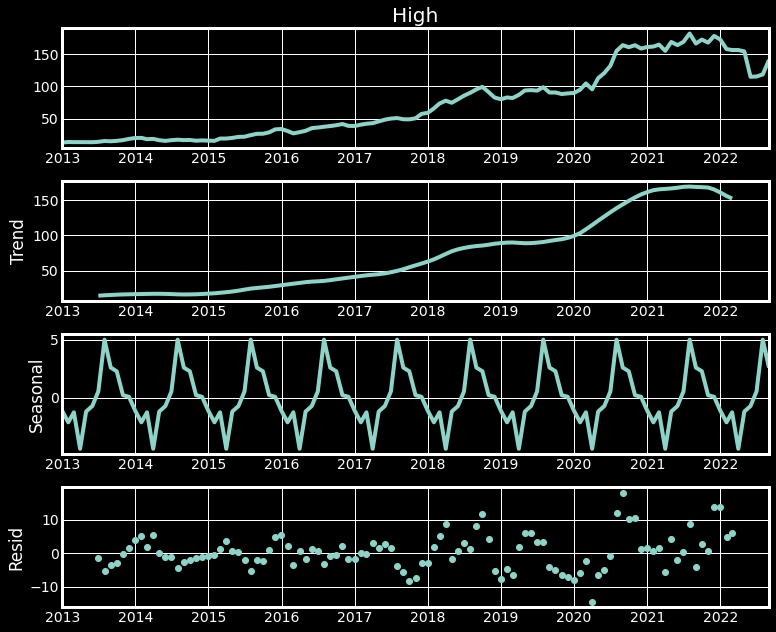

In [193]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['High'], model='Additive')
fig = decomposition.plot()
plt.show()

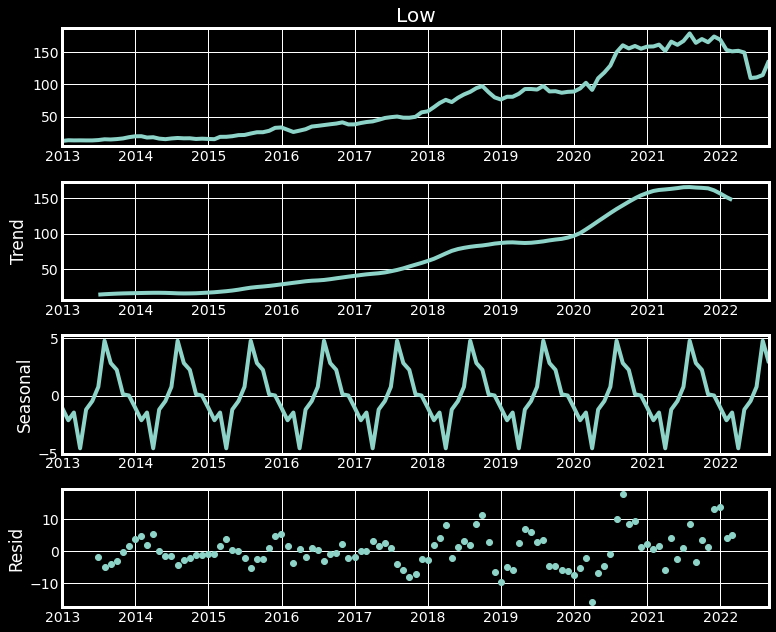

In [194]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Low'], model='Additive')
fig = decomposition.plot()
plt.show()

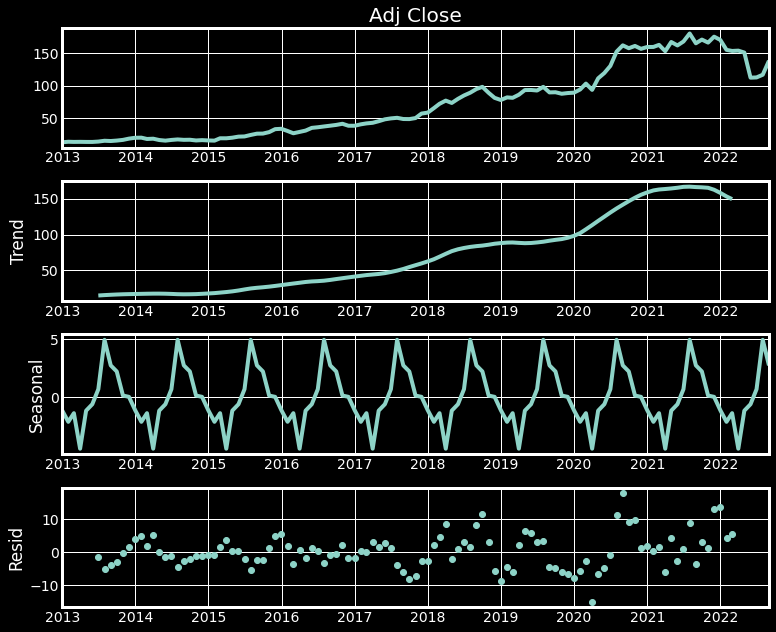

In [195]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Adj Close'], model='Additive')
fig = decomposition.plot()
plt.show()

### **Plotting The Change**

#### **Shift**

The shift function shifts the data before or after the specified amount of time. It will shift the data by one day by default. That means you will get the previous day's data. In financial data like this one, it is helpful to see previous day data and today's data side by side.

In [196]:
df = all_data

<AxesSubplot:xlabel='Date'>

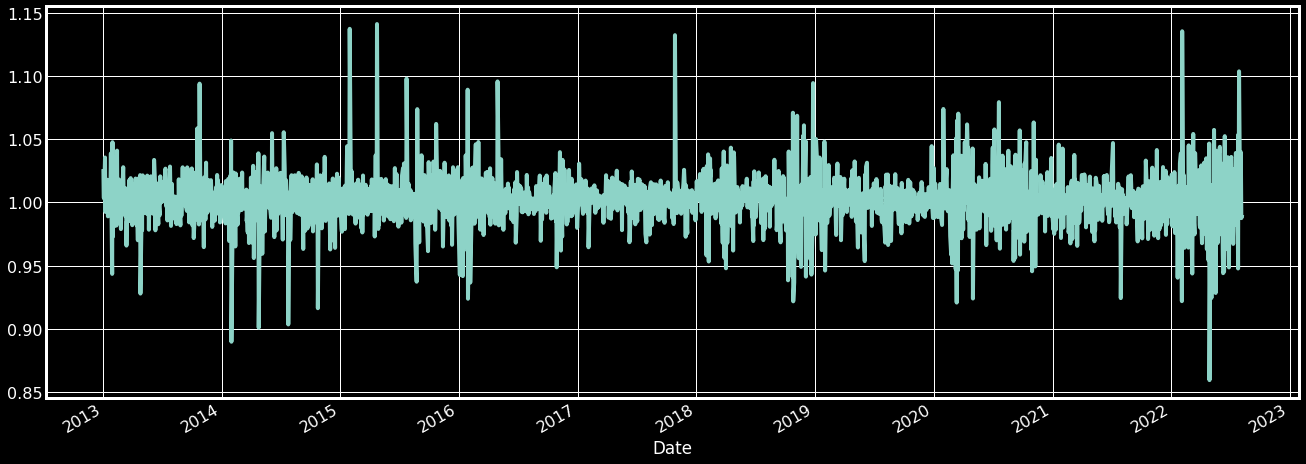

In [197]:
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize=(20, 8), fontsize = 16)

In the code above, .div() helps to fill up the missing data. Actually, div() means division. df. div(6) will divide each element in df by 6. But here I used ‘df.Close.shift()’. So, Each element of df will be divided by each element of ‘df.Close.shift()’. We do this to avoid the null values that are created by the ‘shift()’ operation.

### **Heat Map**

In [198]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

# **Preprocessing**

In [199]:
print("There are "+ str(all_data[:'2020'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2021':].shape[0]) + " observations in the test data")

There are 2016 observations in the training data
There are 402 observations in the test data


In [200]:
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2020/12/31
      X_test:  data from 2021 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

(2010, 5)

In [201]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

0       1       2       3       4       0       1
0      12.54   12.87   12.92   12.96   13.42   13.32   13.32
1      12.87   12.92   12.96   13.42   13.32   13.32   13.27
2      12.92   12.96   13.42   13.32   13.32   13.27   13.40
3      12.96   13.42   13.32   13.32   13.27   13.40   13.64
4      13.42   13.32   13.32   13.27   13.40   13.64   13.60
...      ...     ...     ...     ...     ...     ...     ...
2005  162.05  161.80  160.08  160.31  160.33  159.26  158.63
2006  161.80  160.08  160.31  160.33  159.26  158.63  164.20
2007  160.08  160.31  160.33  159.26  158.63  164.20  166.10
2008  160.31  160.33  159.26  158.63  164.20  166.10  164.29
2009  160.33  159.26  158.63  164.20  166.10  164.29  162.85

[2010 rows x 7 columns]

In [202]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

0       1       2       3       4
0    158.63  164.20  166.10  164.29  162.85
1    164.20  166.10  164.29  162.85  159.33
2    166.10  164.29  162.85  159.33  160.93
3    164.29  162.85  159.33  160.93  156.92
4    162.85  159.33  160.93  156.92  158.11
..      ...     ...     ...     ...     ...
395  122.42  121.14  114.81  120.97  122.28
396  121.14  114.81  120.97  122.28  134.95
397  114.81  120.97  122.28  134.95  135.39
398  120.97  122.28  134.95  135.39  134.16
399  122.28  134.95  135.39  134.16  139.52

[400 rows x 5 columns]

In [203]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 2010 samples in the training data
There are 400 samples in the test data


# **Model Building**

## **Simple RNN**

In [204]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)
rnn_predictions[1:10]

array([[50.455753, 51.112053],
       [50.455753, 51.112053],
       [50.455753, 51.112053],
       [50.455753, 51.112053],
       [50.455753, 51.112053],
       [50.455753, 51.112057],
       [50.455753, 51.112053],
       [50.455753, 51.112053],
       [50.455753, 51.112053]], dtype=float32)

(11542.053, <AxesSubplot:xlabel='Date'>)

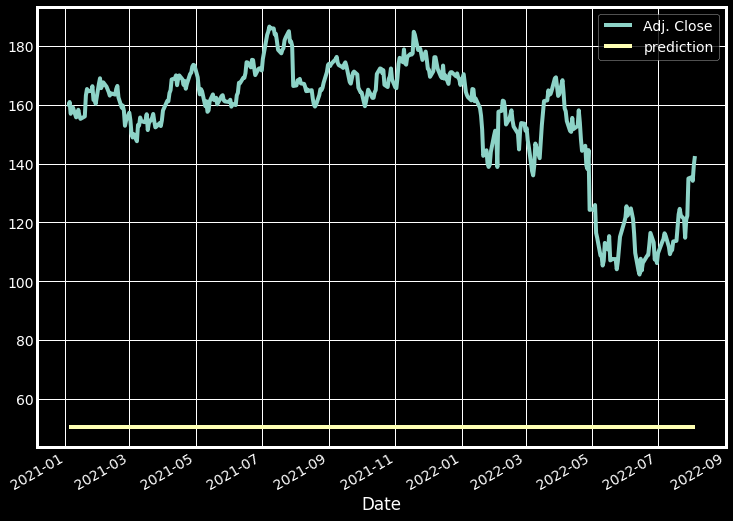

In [205]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2021':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot() )
    
actual_pred_plot(rnn_predictions)  

(23.659605, <AxesSubplot:xlabel='Date'>)

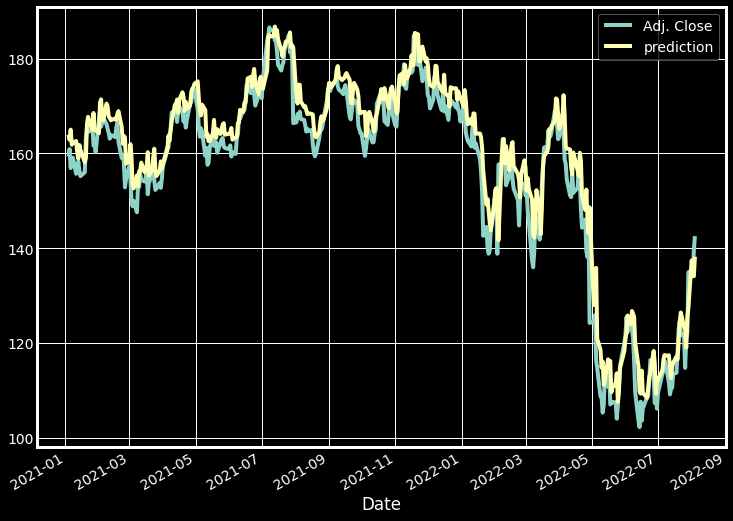

In [206]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2020/12/31
      X_test:  data from 2021 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2020'].iloc[:,0:1].values
    ts_test  = all_data['2021':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2020'], all_data["Adj Close"]['2021':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

def simple_rnn_model(X_train, y_train, X_test, sc):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = sc.inverse_transform(rnn_predictions)

    return my_rnn_model, rnn_predictions


X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)
my_rnn_model, rnn_predictions_2 = simple_rnn_model(X_train, y_train, X_test, sc)
rnn_predictions_2[1:10]
actual_pred_plot(rnn_predictions_2)   

## **Simple LSTM**

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
14/14 [==============================] - 2s 7ms/step - loss: 0.0990
Epoch 2/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0695
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0612
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0575
Epoch 5/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0539
Epoch 6/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0506
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0473
Epoch 8/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0437
Epoch 9/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0399
Epoch 10/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0359
Epoch 11/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 12/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0272
Epoch 13/50
14/14 [============================

(54.722412, <AxesSubplot:xlabel='Date'>)

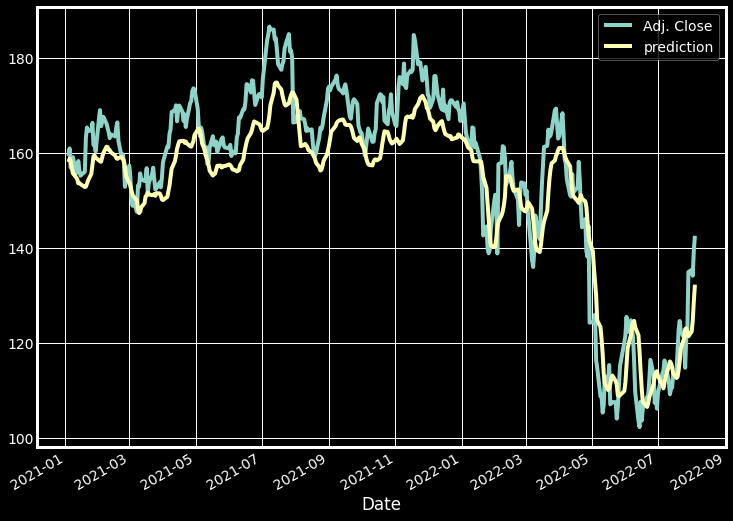

In [207]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from tensorflow.keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=1)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)   

## **Simple GRU**

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
14/14 [==============================] - 2s 6ms/step - loss: 0.0830
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.0471
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0287
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0165
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 8/50
14/14 [==============================] - 0s 8ms/step - loss: 3.9567e-04
Epoch 9/50
14/14 [==============================] - 0s 9ms/step - loss: 2.0475e-04
Epoch 10/50
14/14 [==============================] - 0s 7ms/step - loss: 1.7869e-04
Epoch 11/50
14/14 [==============================] - 0s 7ms/step - loss: 1.7752e-04
Epoch 12/50
14/14 [==============================] - 0s 8ms/step - loss: 1.7722e-04
Epoch 13/50
14/14 [==========

(26.164865, <AxesSubplot:xlabel='Date'>)

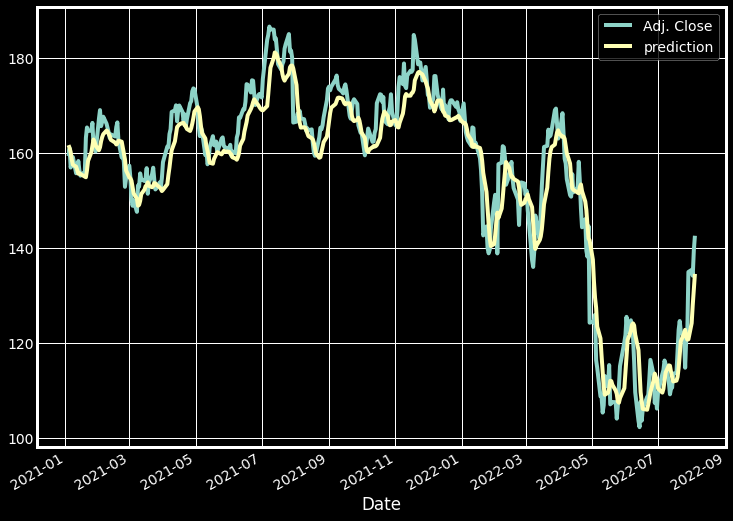

In [208]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=1)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]
actual_pred_plot(GRU_prediction)  

In [209]:
GRU_prediction[1:10]

array([[161.02399, 161.30151],
       [160.16692, 160.42433],
       [158.57698, 158.83316],
       [157.51738, 157.76102],
       [157.09276, 157.32788],
       [156.40248, 156.64423],
       [155.61299, 155.85176],
       [155.77023, 155.99533],
       [155.55759, 155.78761]], dtype=float32)

## **Stacked LSTM**

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
14/14 [==============================] - 3s 10ms/step - loss: 0.0986
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0699
Epoch 3/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0647
Epoch 4/50
14/14 [==============================] - 0s 12ms/step - loss: 0.0643
Epoch 5/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0629
Epoch 6/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0623
Epoch 7/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0615
Epoch 8/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0609
Epoch 9/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0601
Epoch 10/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0594
Epoch 11/50
14/14 [==============================] - 0s 12ms/step - loss: 0.0586
Epoch 12/50
14/14 [==============================] - 0s 12ms/step - loss: 0.0577
Epoch 13/50
14/14 [==================

(80.64729, <AxesSubplot:xlabel='Date'>)

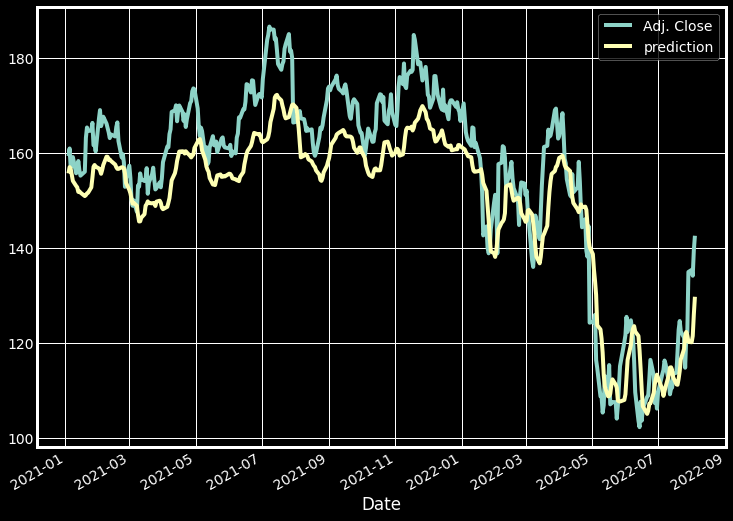

In [210]:
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout
    from tensorflow.keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    # my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dropout(0.2))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=1)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)  

## **Stacked GRU**

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
14/14 [==============================] - 5s 17ms/step - loss: 0.0903
Epoch 2/50
14/14 [==============================] - 0s 17ms/step - loss: 0.0630
Epoch 3/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0555
Epoch 4/50
14/14 [==============================] - 0s 22ms/step - loss: 0.0477
Epoch 5/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0398
Epoch 6/50
14/14 [==============================] - 0s 24ms/step - loss: 0.0301
Epoch 7/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0193
Epoch 8/50
14/14 [==============================] - 0s 19ms/step - loss: 0.0099
Epoch 9/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0044
Epoch 10/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0027
Epoch 11/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 12/50
14/14 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 13/50
14/14 [==================

(26.164865, <AxesSubplot:xlabel='Date'>)

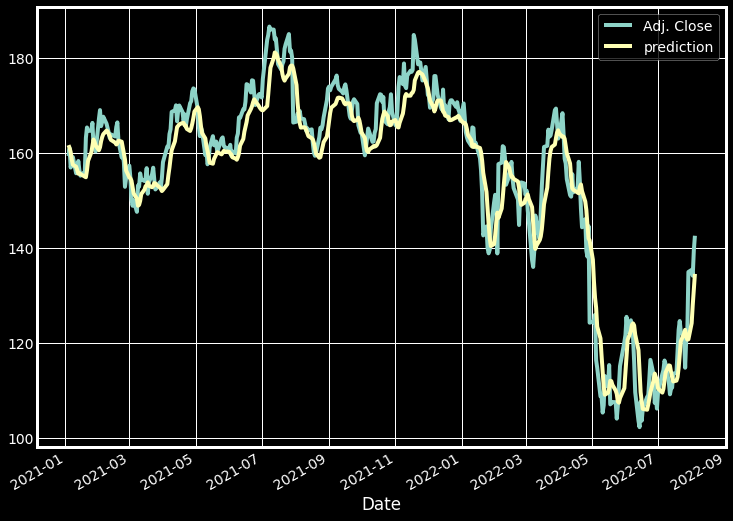

In [211]:
def GRU_model_regularization(X_train, y_train, X_test, sc):
    '''
    create GRU model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD
    from keras.layers import Dropout
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Second GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    
    # Third GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # The output layer
    my_GRU_model.add(Dense(units=2))
    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=1)

    GRU_predictions = my_GRU_model.predict(X_test)
    GRU_predictions = sc.inverse_transform(GRU_predictions)

    return my_GRU_model, GRU_predictions

my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, y_train, X_test, sc)
GRU_predictions[1:10]
actual_pred_plot(GRU_prediction)  